In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('distillation-tower.csv')
invt = data['InvTemp3']
vp = data['VapourPressure']

In [46]:
data

,Date,Temp1,FlowC1,Temp2,TempC1,Temp3,TempC2,TempC3,Temp4,PressureC1,...,Temp10,FlowC3,FlowC4,Temp11,Temp12,InvTemp1,InvTemp2,InvTemp3,InvPressure1,VapourPressure
0,2000-08-21,139.9857,432.0636,377.8119,100.2204,492.1353,490.1459,180.5578,187.4331,215.0627,...,513.9653,8.6279,10.5988,30.8983,489.9900,2.0409,2.6468,2.1681,4.3524,32.5026
1,2000-08-23,131.0470,487.4029,371.3060,100.2297,482.2100,480.3128,172.6575,179.5089,205.0999,...,504.5145,8.7662,10.7560,31.9099,480.2888,2.0821,2.6932,2.2207,4.5497,34.8598
2,2000-08-26,118.2666,437.3516,378.4483,100.3084,488.7266,487.0040,165.9400,172.9262,205.0304,...,508.9997,8.5319,10.5737,29.9165,486.6190,2.0550,2.6424,2.1796,4.5511,32.1666
3,2000-08-29,118.1769,481.8314,378.0028,95.5766,493.1481,491.1137,167.2085,174.2338,205.2561,...,514.1794,8.6260,10.6695,30.6229,491.1304,2.0361,2.6455,2.1620,4.5464,30.4064
4,2000-08-30,120.7891,412.6471,377.8871,92.9052,490.2486,488.6641,167.0326,173.9681,205.0883,...,511.0948,8.5939,10.4922,29.4977,487.6475,2.0507,2.6463,2.1704,4.5499,30.9238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2003-01-26,130.8138,212.6385,341.5964,121.4354,468.3401,467.0299,174.7639,180.7649,229.7393,...,479.0290,5.5590,6.4470,16.4131,466.3347,2.1444,2.9274,2.2127,4.0911,38.8507
249,2003-01-28,128.9673,225.1412,349.8965,118.8604,479.7665,478.4652,176.2176,182.3646,230.5049,...,491.2362,5.6342,6.4360,17.2385,477.8816,2.0926,2.8580,2.1620,4.0783,34.2653
250,2003-01-31,130.5328,223.5965,345.9366,120.4027,474.5378,473.1145,176.3310,182.2578,230.6638,...,485.8786,5.4810,6.3575,16.9866,472.3176,2.1172,2.8907,2.1855,4.0756,36.5717
251,2003-02-03,128.5248,213.5613,343.4950,119.6989,469.3802,467.9954,174.6435,180.5093,230.5226,...,480.2879,5.4727,6.4175,16.6778,467.0001,2.1413,2.9113,2.2090,4.0780,38.1054


In [47]:
vp

0      32.5026
1      34.8598
2      32.1666
3      30.4064
4      30.9238
        ...   
248    38.8507
249    34.2653
250    36.5717
251    38.1054
252    35.6298
Name: VapourPressure, Length: 253, dtype: float64

In [48]:
invt = np.array(invt)
vp = np.array(vp)
vp = np.log(vp)

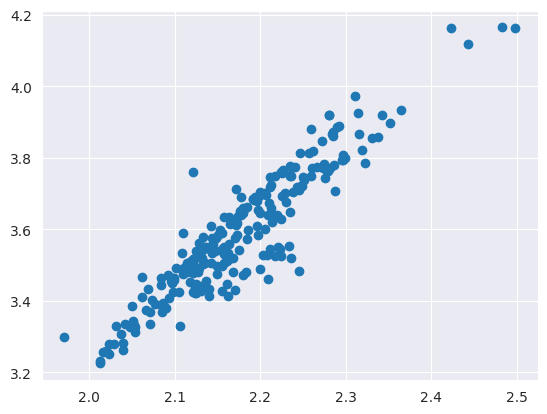

In [49]:
plt.scatter(invt, vp)

In [50]:
invt1 = data['InvTemp1']
invt2 = data['InvTemp2']

In [51]:
invt1 = np.array(invt1)
invt2 = np.array(invt2)

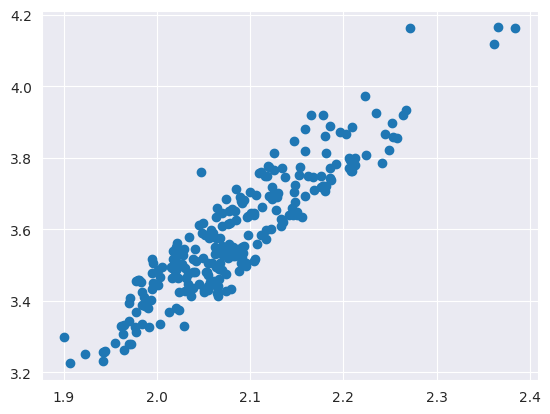

In [52]:
plt.scatter(invt1, vp)

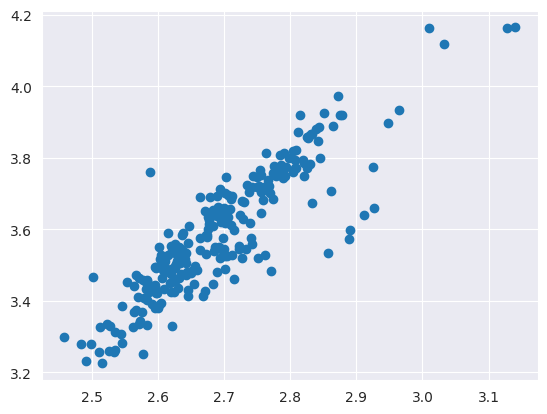

In [53]:
plt.scatter(invt2, vp)

In [54]:
from sklearn.linear_model import LinearRegression

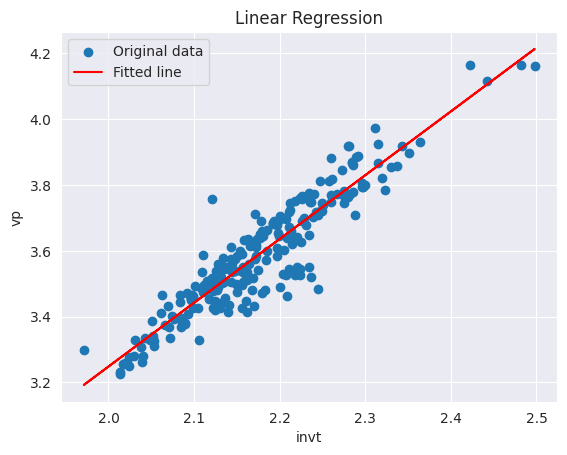

R-squared: 0.8649881279307753


In [55]:
invt = np.array(invt).reshape(-1, 1)
vp = np.array(vp)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model
model.fit(invt, vp)

# Now you can use the model to make predictions
vp_pred = model.predict(invt)

# Plotting the original scatter plot
plt.scatter(invt, vp, label='Original data')

# Plotting the regression line
plt.plot(invt, vp_pred, color='red', label='Fitted line')

plt.xlabel('invt')
plt.ylabel('vp')
plt.title('Linear Regression')
plt.legend()

plt.show()

# If you want to evaluate the model you can use metrics like R-squared
r_squared = model.score(invt, vp)
print(f'R-squared: {r_squared}')

In [56]:
vp_pred = model.predict(invt)
data['Antoine'] = vp_pred

In [57]:
data

,Date,Temp1,FlowC1,Temp2,TempC1,Temp3,TempC2,TempC3,Temp4,PressureC1,...,FlowC3,FlowC4,Temp11,Temp12,InvTemp1,InvTemp2,InvTemp3,InvPressure1,VapourPressure,Antoine
0,2000-08-21,139.9857,432.0636,377.8119,100.2204,492.1353,490.1459,180.5578,187.4331,215.0627,...,8.6279,10.5988,30.8983,489.9900,2.0409,2.6468,2.1681,4.3524,32.5026,3.574040
1,2000-08-23,131.0470,487.4029,371.3060,100.2297,482.2100,480.3128,172.6575,179.5089,205.0999,...,8.7662,10.7560,31.9099,480.2888,2.0821,2.6932,2.2207,4.5497,34.8598,3.675994
2,2000-08-26,118.2666,437.3516,378.4483,100.3084,488.7266,487.0040,165.9400,172.9262,205.0304,...,8.5319,10.5737,29.9165,486.6190,2.0550,2.6424,2.1796,4.5511,32.1666,3.596331
3,2000-08-29,118.1769,481.8314,378.0028,95.5766,493.1481,491.1137,167.2085,174.2338,205.2561,...,8.6260,10.6695,30.6229,491.1304,2.0361,2.6455,2.1620,4.5464,30.4064,3.562217
4,2000-08-30,120.7891,412.6471,377.8871,92.9052,490.2486,488.6641,167.0326,173.9681,205.0883,...,8.5939,10.4922,29.4977,487.6475,2.0507,2.6463,2.1704,4.5499,30.9238,3.578498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2003-01-26,130.8138,212.6385,341.5964,121.4354,468.3401,467.0299,174.7639,180.7649,229.7393,...,5.5590,6.4470,16.4131,466.3347,2.1444,2.9274,2.2127,4.0911,38.8507,3.660488
249,2003-01-28,128.9673,225.1412,349.8965,118.8604,479.7665,478.4652,176.2176,182.3646,230.5049,...,5.6342,6.4360,17.2385,477.8816,2.0926,2.8580,2.1620,4.0783,34.2653,3.562217
250,2003-01-31,130.5328,223.5965,345.9366,120.4027,474.5378,473.1145,176.3310,182.2578,230.6638,...,5.4810,6.3575,16.9866,472.3176,2.1172,2.8907,2.1855,4.0756,36.5717,3.607766
251,2003-02-03,128.5248,213.5613,343.4950,119.6989,469.3802,467.9954,174.6435,180.5093,230.5226,...,5.4727,6.4175,16.6778,467.0001,2.1413,2.9113,2.2090,4.0780,38.1054,3.653316


In [58]:
np.exp(vp_pred)

array([35.66038331, 39.48789188, 36.46418789, 35.24123445, 35.81971407,
       34.82026241, 41.41635587, 39.68739489, 38.7674274 , 38.58750475,
       40.70013128, 40.51123879, 38.49039555, 39.74898298, 39.26655219,
       37.9496117 , 35.18663078, 36.71240169, 38.20793687, 36.51369603,
       38.48293574, 36.34423313, 36.47125637, 33.00004776, 44.31494493,
       34.47775119, 37.67842396, 29.4625335 , 30.27884268, 34.98940075,
       31.3295895 , 28.39173791, 27.96030266, 29.56550518, 33.76351419,
       30.62709521, 28.5517779 , 58.38971521, 44.34072091, 45.31382808,
       42.596879  , 39.25894196, 40.58983722, 37.33673475, 40.59770545,
       37.95696813, 32.78328703, 34.01311672, 35.31645287, 33.06407325,
       31.61630398, 31.85620693, 47.03195624, 33.41844034, 39.76439493,
       37.3512114 , 38.86523553, 31.88709508, 29.26900892, 32.23509528,
       33.10254815, 38.37121196, 37.47448971, 30.29058275, 32.84052592,
       32.15397253, 33.97358347, 32.17267503, 42.61339517, 36.32